In [1]:
# Import necessary libraries
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Polygon
import matplotlib.patches as mpatches

In [2]:
# Defining the coordinates of Szolnok city center
# Unfortunately, the districts of Szolnok don't have 'boundary' on OpenStreetMap
miny = 47.164807
minx = 20.174378
maxy = 47.182844
maxx = 20.208108

szolnok_poly = Polygon([(minx, miny), (minx, maxy), (maxx, maxy), (maxx, miny)])

In [3]:
# Define POIs and their tags
poi_tags = {
    "footprints": {"building": True},
    "parks": {"leisure": "park"},
    "playground": {"leisure": "playground"},
    "cafes": {"amenity": "cafe"},
    "restaurants": {"amenity": "restaurant"},
    "schools": {"amenity": "school"},
    "bus_stops": {"highway": "bus_stop"},
    "parking_areas": {"amenity": "parking"},
    "supermarket": {"shop": "supermarket"},
    "museum": {"tourism": "museum"}
}

# Download POIs
pois = {name: ox.features_from_polygon(szolnok_poly, tags=tags) for name, tags in poi_tags.items()}

In [4]:
# Define colors, labels, and zorders for plotting
poi_styles = [
    {"name": "footprints", "color": "dimgrey", "label": "Buildings", "zorder": 1},
    {"name": "parks", "color": "darkgreen", "label": "Parks", "zorder": 1},
    {"name": "playground", "color": "white", "label": "Playground", "zorder": 2},
    {"name": "cafes", "color": "red", "label": "Cafes", "zorder": 2},
    {"name": "restaurants", "color": "cyan", "label": "Restaurants", "zorder": 2},
    {"name": "schools", "color": "purple", "label": "Schools", "zorder": 2},
    {"name": "bus_stops", "color": "darkorange", "label": "Bus Stops", "zorder": 2},
    {"name": "parking_areas", "color": "khaki", "label": "Parking Areas", "zorder": 2},
    {"name": "supermarket", "color": "lawngreen", "label": "Supermarket", "zorder": 2},
    {"name": "museum", "color": "royalblue", "label": "Museum", "zorder": 2}
]

# Define a plotter function
def plot_poi(poi, color, ax, crs, label, zorder):
    poi.to_crs(crs).plot(ax=ax, color=color, markersize=14, alpha=0.8, label=label, zorder=zorder)

In [5]:
# Define custom legend elements
legend_elements = [
    mpatches.Patch(facecolor='dimgrey', edgecolor='black', alpha=0.8, label='Buildings'),
    mpatches.Patch(facecolor='darkgreen', edgecolor='black', alpha=0.8, label='Parks'),
    mpatches.Patch(facecolor='purple', edgecolor='black', alpha=0.8, label='Schools'),
    mpatches.Patch(facecolor='khaki', edgecolor='black', alpha=0.8, label='Parking Areas'),
    mpatches.Patch(facecolor='white', edgecolor='black', alpha=0.8, label='Playground'),
    mpatches.Patch(facecolor='royalblue', edgecolor='black', alpha=0.8, label='Museum'),
    mpatches.Patch(facecolor='lawngreen', edgecolor='black', alpha=0.8, label='Supermarket'),
    plt.Line2D([0], [0], marker='o', linestyle='None', markerfacecolor='red', label='Cafes', markersize=8),
    plt.Line2D([0], [0], marker='o', linestyle='None', markerfacecolor='cyan', label='Restaurants', markersize=8),
    plt.Line2D([0], [0], marker='o', linestyle='None', markerfacecolor='darkorange', label='Bus Stops', markersize=8),
]

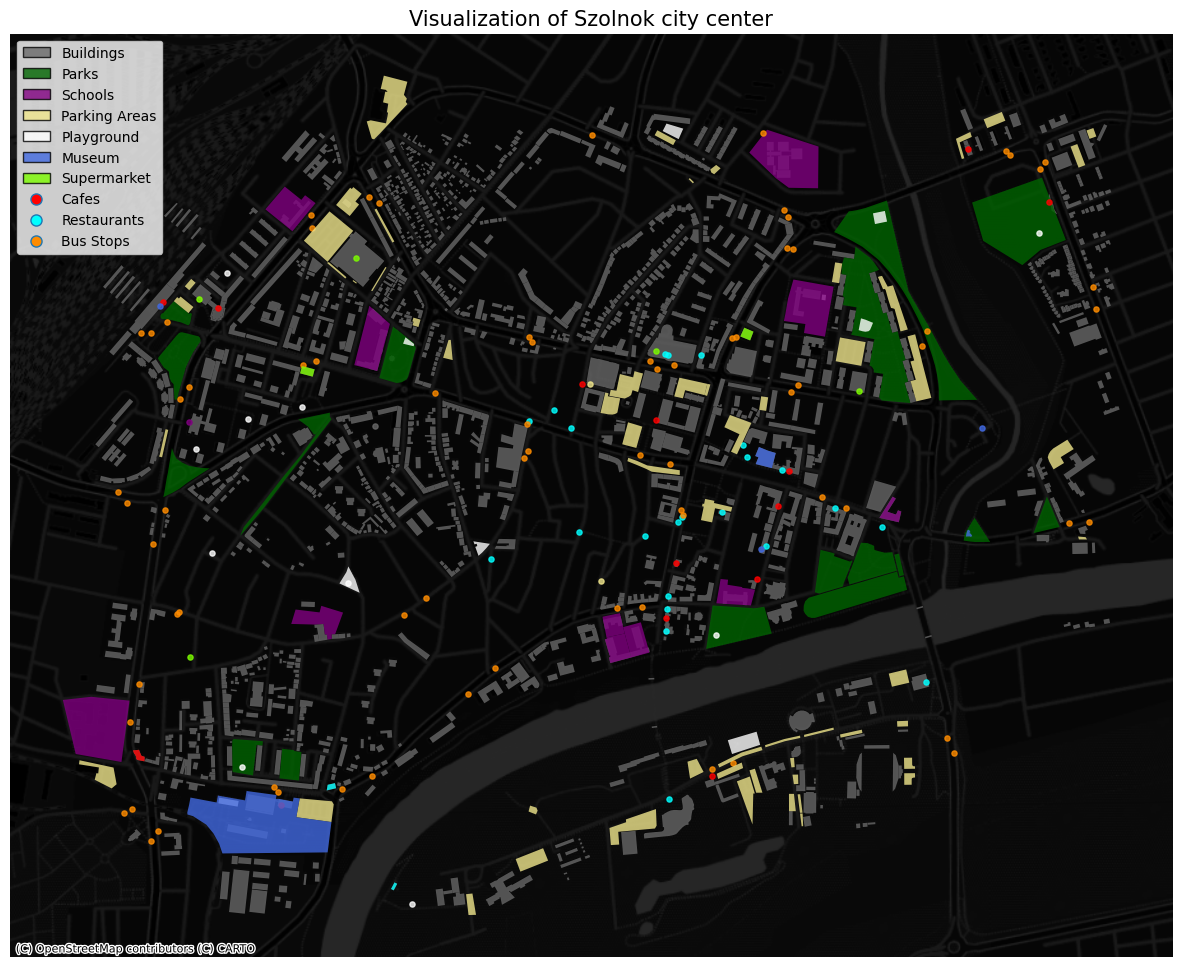

In [6]:
# Create a plot to visualize Szolnok city center and various POIs
crs = 23700 # Define the local CRS

f, ax = plt.subplots(1, 1, figsize = (15, 12))

# Plot all POIs
for style in poi_styles:
    plot_poi(pois[style["name"]], style["color"], ax, crs, style["label"], style["zorder"])

# Add the basemap from contextily
ctx.add_basemap(ax, crs=crs, source=ctx.providers.CartoDB.DarkMatterNoLabels)

# Add title
plt.title('Visualization of Szolnok city center', fontsize=15)
ax.axis('off')

# Add custom legend to the plot
ax.legend(handles=legend_elements, loc='upper left', fontsize=10)

# Show plot
plt.show()